## IR Evaluation
- To do system evaluation, we require an overt expression of an information need
- For relevance we choose to use a binary decision of relevance
- Key measure for a search engine: *user happiness*

How to measure user happiness?
- Most common proxy: *relevance* of search results
- Relevance measurement requires 3 elements:
1) A set document collection
2) A set suite of queries
3) A usually binary assessment of either *Relevant* or *Non-relevant* for each query and document

Note: Relevance is assessed relative to the information need, not the query. We evalute where the doc addresses the information need, not whether it has these words.


### Unranked retrieval evaluation
- Precision: fraction of retrieved docs that are relevant = P(relevant | retrieved)
- Recall: fraction of relevant docs that are retrieved = P(retrieved | relevant) 

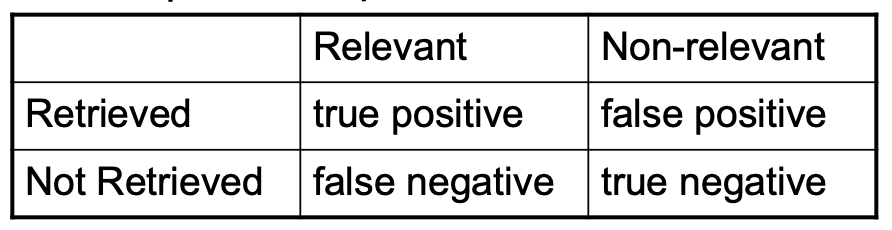

In [3]:
from IPython.display import Image
Image(filename="Precision_recall_table.png", width=800, height=400)

- Precision *P = tp/ (tp + fp)*
- Recall *R = tp/ (tp + fn)*

- Accuracy: fraction of these classifications that are correct
- *Accuracy = (tp + tn) / (tp + fp + tn + fn)*

- You can get high recall (but low precision) by retrieving all docs for all queries
- Recall is a non-decreasing function of the number of docs retrieved

### F measure (harmonic mean)
Balanced method of evaluating a system's precision and recall and retrieval.

- Combined measure that assesses precision / recall tradeoff is *F measure* (weighted harmonic mean):

- Usually use balanced F1 measure 2PR / P + R (i.e. with beta being 1 or alpha being 0.5)
- Harmonic mean is a conservative average

- Can tune beta and alpha to achieve balance `(higher beta -> smaller alpha -> favours recall)`
- Beta > 1 favours recall, beta < 1 emphasises precision

#### Pros over accuracy measure
- Professional searchers (eg, paralegals) will favour higher recall instead as irrelevant docs may be useful

#### Pros over arithmetic mean:
- Arithmetic mean is evenly distributed, meaning a 100% recall (returning all docs) and yield 50% of the average mean

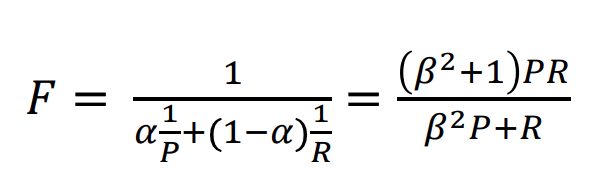

In [4]:
from IPython.display import Image
Image(filename="F_measure.png", width=800, height=400)

### F measure for classes

eg. given a fixed number of classes: (person_name, company_name, neither).

We wish to find the F measure of the prediction on these classes. To do so we have to use micro/ macro averaging.

- Use micro averaging when we wish to determine the effectiveness in large classes
- Use macro averaging when we wish to determine effectiveness of small classes  

**Microaveraging** pools per document decisions across classes and consider the F measure there.  
**Macroaveraging** calculate F measure per class and then average them.

### Ranked retrieval evaluation
- Relevant documents should be ranked higher than non relevant documents
- By taking various numbers of the top returned documents (levels of recall), we can produce a *precision-recall curve*

### Precision at top K (widely used)
Find precision at top K results. Good for most web searches as people only want the good matches on the first or second result page.

- Does not average well as it depends greatly on the number of relevant docs for a query

### 11-point interpolated average precision
Take precision at 11 levels of recall varying from 0 to 1 by tenths of documents using interpolation and average them. This evaluates performance at all recall levels.


### MAP (mean average precision)
Area under precision-recall curve (uninterpolated)

- Dependent on the test collection - arithmetic average of the query collection, some can get MAP of 0.7 and some 0.1
- MAP treats every information need with equal weightage
- MAP scores vary from user to user (information need), thus it is important to have multiple query categories

### R-precision
With known set of relevant documents size `Rel`, calculate the precision of top `Rel` docs returned  
If there are `Rel` documents for a query and we find that `r` are relevant, we find R-precision by taking `r/Rel`

### Variance
- It is usually that a system does poorly on some information needs and excellent on others
- It is usually the case that the variance in performance of the same system across queries is much greater than the variance of different systems on the same query

## Creating test collections
We need:

- test queries (what queries to choose which are relevant to the docs available)
- relevance assessments (what is relevant?)

### Kappa measure

- Agreement measure among judges
- Designed for categorical judgments
- Corrects for chance agreement

`K = (P(A)-P(E))/(1-P(E))`

P(A): proportion of time judges agree  
P(E): Probability of chance agreement = P(non-relevant of Judge 1) * P(non-relevant of Judge 2) + P(relevant of Judge 1) * P(relevant of Judge 2)

Example calculation for P(E)
- Judge 1 believes 320 / 400 documents are relevant (80%)
- Judge 2 believes 310 / 400 documents are relevant (77.5%)
- Chance prob. of both thinking a document is relevant = 0.8 * 0.775 = 0.62

- Similarly, for non-relevant docs. it'll be 0.2 * 0.225 = 0.045

- Hence, P(E) = 0.62 + 0.045 = 0.665

Some examples:

- Kappa > 0.8 good agreement
- 0.67 < Kappa < 0.8 fair agreement
- Kappa < 0.67 dubious

### Other factors

Relevance vs marginal relevance
- A document can be redundant even if it is highly relevant eg. useless spam
- Duplicates
- Same info from different sources (git forks)?
- Marginal relevance is a better measure of utlity for the user

### Other methods

- Use crowdsourcing methods to collect data
- A/B testing
    - evaluate with automatic overall evaluation criterion (OEC) eg. clickthrough on first result
    - However, still have pitfalls when both A and B versions are vastly different, hard to associate OEC with changes
- In lab testing, study user behaviours in the lab